## Matplotlib 中的文字与图例

### Figure 和 Axes 上的文本

在 Matplotlib 中，文本的显示不仅仅局限于基本的标签和标题。Matplotlib 提供了丰富的文本显示功能，包括对数学表达式的支持、TrueType 字体的栅格和矢量输出、可任意旋转的换行文本，以及对 Unicode 字符的支持。

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

#### 文本 API 示例

Matplotlib 中创建文本的方式可以通过 pyplot API 或面向对象的 API 来实现。下面我们将介绍这两种方式。

**Pyplot API vs. OO API**

| 函数     | Pyplot API | OO API       | 描述                                           |
| -------- | ---------- | ------------ | ---------------------------------------------- |
| 文本添加 | `text`     | `text`       | 在子图 `Axes` 的任意位置添加文本               |
| 注解添加 | `annotate` | `annotate`   | 在子图 `Axes` 的任意位置添加注解，通常带有箭头 |
| X 轴标签 | `xlabel`   | `set_xlabel` | 为子图 `Axes` 添加 X 轴标签                    |
| Y 轴标签 | `ylabel`   | `set_ylabel` | 为子图 `Axes` 添加 Y 轴标签                    |
| 标题添加 | `title`    | `set_title`  | 为子图 `Axes` 添加标题                         |
| 画布文本 | `figtext`  | `text`       | 在整个画布 `Figure` 的任意位置添加文本         |
| 画布标题 | `suptitle` | `suptitle`   | 为整个画布 `Figure` 添加标题                   |

接下来，我们通过一个综合的例子来展示这些 API 如何在一个图像中控制不同部分的文本。在后续的章节中，我们将更详细地分析这些 API 的使用技巧。

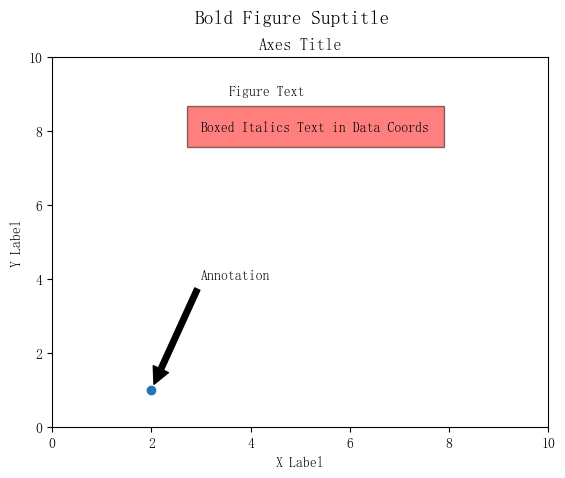

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

# 为 Figure 和 Axes 设置标题，注意两者的位置区别
fig.suptitle('Bold Figure Suptitle', fontsize=14, fontweight='bold')
ax.set_title('Axes Title')

# 设置 X 和 Y 轴标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# 设置 X 和 Y 轴显示范围
ax.axis([0, 10, 0, 10])

# 在 Axes 上添加文本
ax.text(3, 8, 'Boxed Italics Text in Data Coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# 在 Figure 上添加文本，通常更常见的是在 Axes 上添加文本
fig.text(0.4, 0.8, 'Figure Text')

ax.plot([2], [1], 'o')
# 添加注解
ax.annotate('Annotation', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05));

#### `text` - 在 Axes 上添加文本

`text` 方法的调用格式为 `Axes.text(x, y, s, fontdict=None, **kwargs)`，其中：

- `x`, `y` 是文本出现的坐标位置。
- `s` 是文本内容。
- `fontdict` 是一个可选参数，用于覆盖默认的文本属性。
- `**kwargs` 是关键字参数，用于传入文本样式参数。

`fontdict` 和 `**kwargs` 都可以用于调整文本样式。这两种方式的最终效果相同，并且这不仅适用于 `text` 方法，其他文本相关的方法如 `set_xlabel`, `set_title` 等也可以使用这两种方式来修改样式。下面的例子演示了如何使用这两种方式。

Text(0.3, 0.8, 'Modified by fontdict')

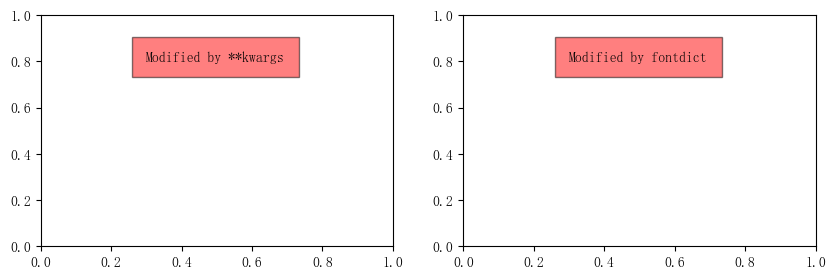

In [17]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)

# 使用关键字参数修改文本样式
axes[0].text(0.3, 0.8, 'Modified by **kwargs', style='italic',
             bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# 使用 fontdict 参数修改文本样式
font = {'style': 'italic', 'bbox': {'facecolor': 'red', 'alpha': 0.5, 'pad': 10}}
axes[1].text(0.3, 0.8, 'Modified by fontdict', fontdict=font)

Matplotlib 支持的所有文本样式参数可以在官方文档中找到。通常在需要时查询即可。下表列举了一些常用的参数供参考：

| 属性名                        | 描述                                                   |
| ----------------------------- | ------------------------------------------------------ |
| `alpha`                       | 透明度，值越小越透明，值越大越不透明                   |
| `backgroundcolor`             | 文本的背景颜色                                         |
| `bbox`                        | 设置文本周围的边框属性                                 |
| `color` 或 `c`                | 字体颜色                                               |
| `fontfamily` 或 `family`      | 字体类型，如 'serif', 'sans-serif'                     |
| `fontsize` 或 `size`          | 字体大小，可以是绝对值或相对大小，如 'small', 'medium' |
| `fontstyle` 或 `style`        | 字体样式，如 'normal', 'italic', 'oblique'             |
| `fontweight` 或 `weight`      | 字体粗细，如 'normal', 'bold', 'heavy'                 |
| `horizontalalignment` 或 `ha` | 文本水平对齐方式，如 'center', 'right', 'left'         |
| `linespacing`                 | 行间距，为字体大小的倍数                               |
| `rotation`                    | 文本旋转角度，如 'vertical', 'horizontal' 或具体数值   |
| `verticalalignment` 或 `va`   | 文本垂直对齐方式，如 'center', 'top', 'bottom'         |

#### `xlabel` 和 `ylabel` - 子图的 X，Y 轴标签

`xlabel` 和 `ylabel` 方法分别用于添加 X 轴和 Y 轴标签。这里以 `xlabel` 为例，其调用方式为 `Axes.set_xlabel(xlabel, fontdict=None, labelpad=None, loc=None, **kwargs)`，其中：

- `xlabel` 是标签内容。
- `fontdict` 和 `**kwargs` 用来修改样式，参考上一小节。
- `labelpad` 是标签和坐标轴的距离，默认为 4。
- `loc` 为标签位置，可选值为 'left', 'center', 'right'，默认为 'center'。

Text(0.2, Text(0.3, 0.8, 'Modified by fontdict'), 'X Label')

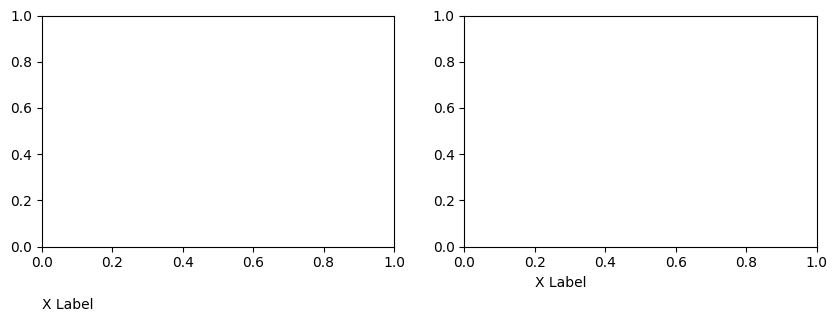

In [5]:
# 观察 labelpad 和 loc 参数的使用效果
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
axes[0].set_xlabel('X Label', labelpad=20, loc='left')

# loc 参数仅提供粗略的位置调整，如果想要更精确的设置标签位置，可以使用 position 参数配合 horizontalalignment 参数
axes[1].set_xlabel('X Label', position=(0.2, _), horizontalalignment='left')

#### `title` 和 `suptitle` - 子图和画布的标题

`title` 方法用于为子图 `Axes` 添加标题，调用方式为 `Axes.set_title(label, fontdict=None, loc=None, pad=None, **kwargs)`，其中：

- `label` 是标题内容。
- `pad` 是标题与图表顶部的距离，默认为 6。
- `y` 是标题在子图垂直方向上的位置，默认值为 1，即位于子图顶部。

`suptitle` 方法用于为整个画布 `Figure` 添加标题，调用方式为 `Figure.suptitle(t, **kwargs)`，其中 `t` 是标题内容。

Text(0.5, 1.0, 'Title with Default Pad')

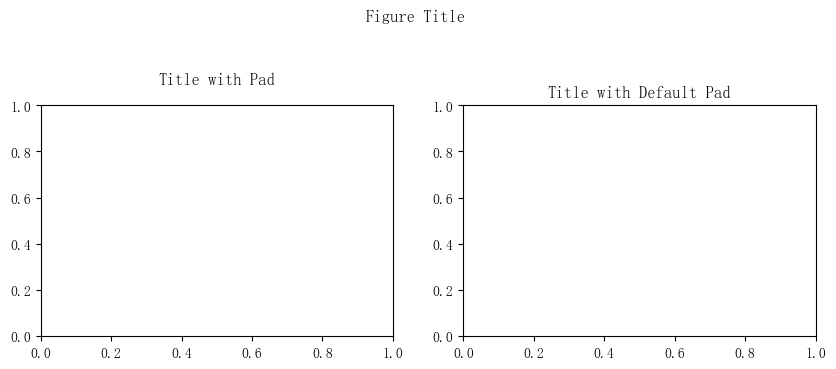

In [18]:
# 观察 pad 参数的使用效果
fig = plt.figure(figsize=(10, 3))
fig.suptitle('Figure Title', y=1.2)  # 通过参数 y 调整标题高度
axes = fig.subplots(1, 2)
axes[0].set_title('Title with Pad', pad=15)
axes[1].set_title('Title with Default Pad', pad=6)

#### `annotate` - 子图的注解

`annotate` 方法用于在 `Axes` 上添加注解，调用方式为 `Axes.annotate(text, xy, *args, **kwargs)`，其中：

- `text` 是注解内容。
- `xy` 是注解箭头指向的坐标。
- `xytext` 是注解文本的坐标（可选）。
- `xycoords` 和 `textcoords` 分别定义 `xy` 和 `xytext` 的坐标系（可选）。
- `arrowprops` 定义箭头样式（可选）。

注解的参数非常丰富，这里仅展示一个简单的例子，更多参数可以参考官方文档。

Text(0.8, 0.8, 'Annotation')

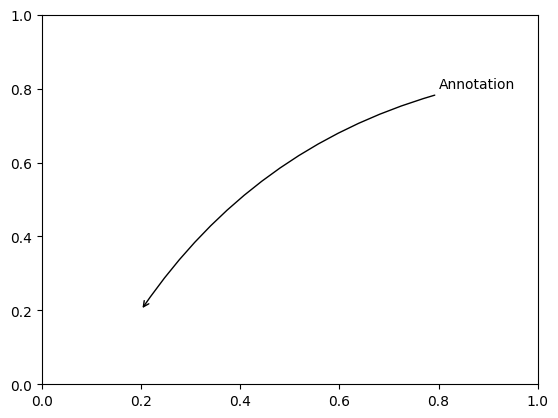

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate("Annotation",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

#### 字体的属性设置

在 Matplotlib 中，字体的设置既可以全局进行，也可以针对局部进行。全局设置会影响所有的图表，而局部设置只影响特定的文本元素。

**全局字体设置**

全局字体设置可以通过修改 `rcParams` 来实现，例如：

In [8]:
plt.rcParams['font.sans-serif'] = ['SimSun']    # 设置默认字体为 SimSun。
plt.rcParams['axes.unicode_minus'] = False      # 解决负号 '-' 显示为方块的问题。

**局部字体设置**

局部设置一般在绘制文本时直接指定，例如：

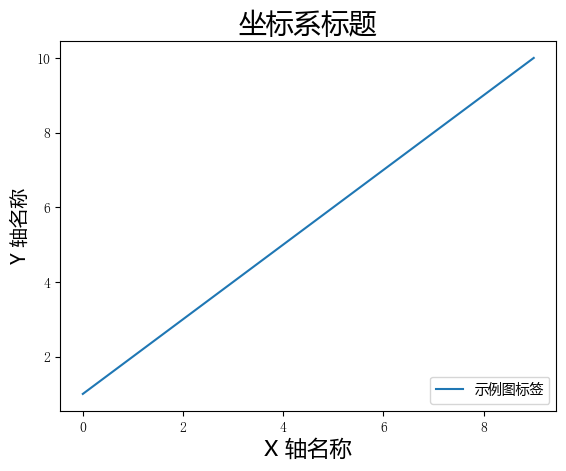

In [19]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='示例图标签')

plt.xlabel('X 轴名称', fontproperties='Microsoft YaHei', fontsize=16)  # 设置 X 轴名称，采用微软雅黑字体
plt.ylabel('Y 轴名称', fontproperties='Microsoft YaHei', fontsize=14)  # 设置 Y 轴名称
plt.title('坐标系标题', fontproperties='Microsoft YaHei', fontsize=20)  # 设置坐标系标题字体
plt.legend(loc='lower right', prop={'family': 'Microsoft YaHei'}, fontsize=10)  # 设置图例字体

### Tick 上的文本

设置刻度（tick）和刻度标签（ticklabel）是可视化过程中常见的操作。Matplotlib 提供了多种方式来自定义这些元素，既可以手动设置，也可以使用自动生成的模式。

#### 简单模式

可以使用 `set_ticks` 方法手动设置刻度位置，使用 `set_ticklabels` 方法手动设置刻度标签。

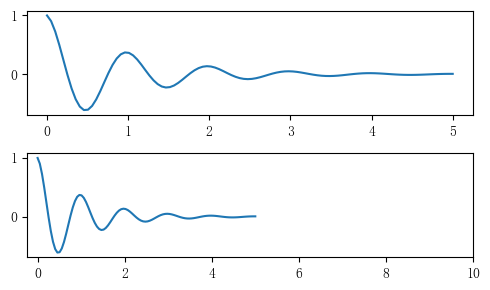

In [10]:
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

# 手动设置刻度位置的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.))
plt.show()

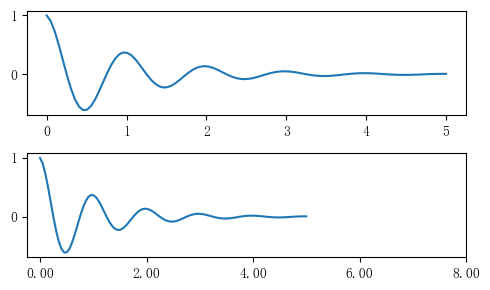

In [23]:
# 手动设置刻度标签的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
tick_labels = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tick_labels)
plt.show()

#### Tick Formatters

除了简单模式，还可以使用 Formatters 来设置刻度位置和格式。这提供了更高的灵活性，尤其是在处理复杂的数据格式时。


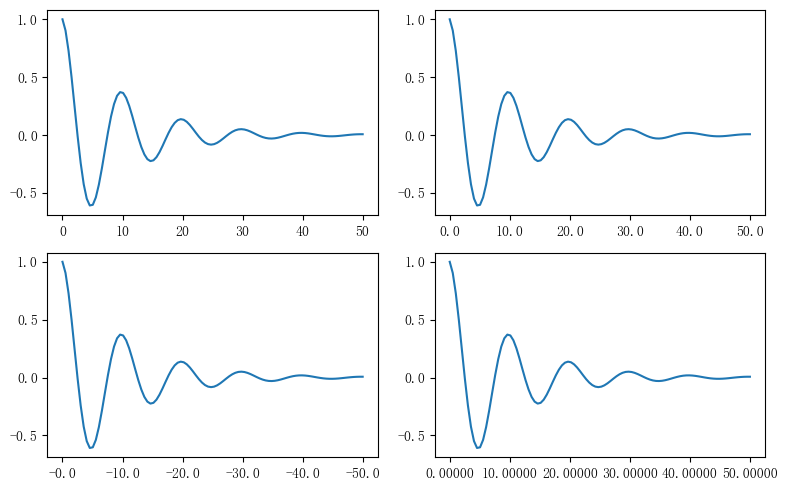

In [13]:
# 使用字符串格式设置刻度格式的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1 * 10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter)
plt.show()

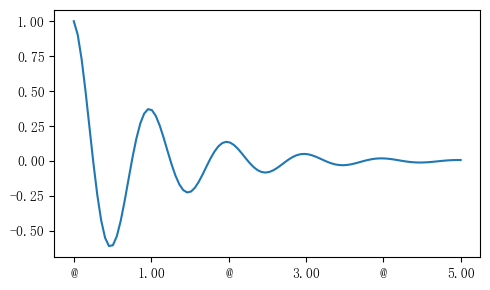

In [25]:
# 使用函数设置刻度格式的例子
def format_odd_ticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return "@"

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(format_odd_ticks);

### Legend（图例）

在 Matplotlib 中，图例是用来辨识各种图形元素的关键工具。图例由多个条目组成，每个条目由一个 key（图例键）和一个 label（图例标签）组成。

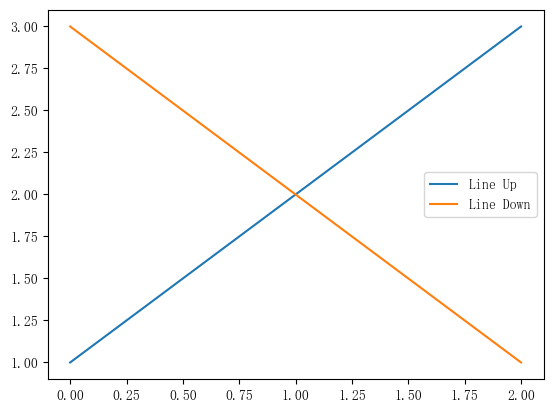

In [16]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line Up')
line_down, = ax.plot([3, 2, 1], label='Line Down')
ax.legend(handles=[line_up, line_down], labels=['Line Up', 'Line Down'])
plt.show()

**设置图例位置**

`loc` 参数可以是一个字符串或数字，表示图例的位置。

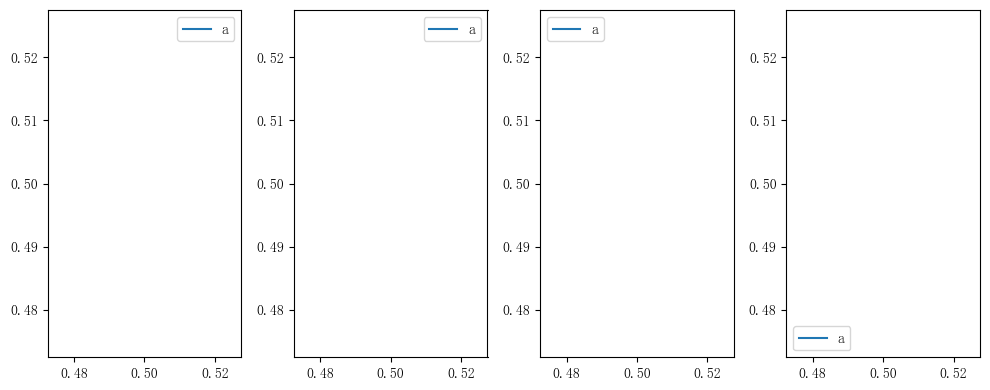

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))
for i in range(4):
    axes[i].plot([0.5], [0.5])
    axes[i].legend(labels='a', loc=i)  # 观察 loc 参数传入不同值时图例的位置
fig.tight_layout()

**设置图例边框及背景**

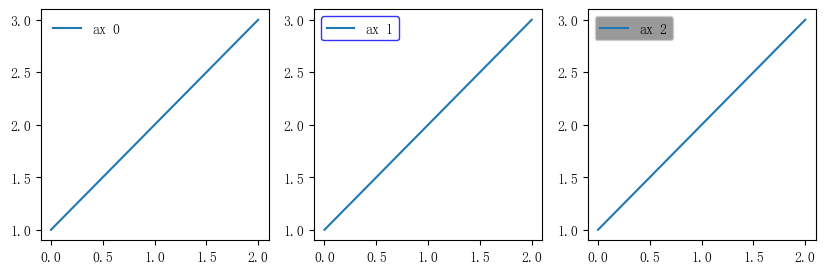

In [18]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 3)
for i, ax in enumerate(axes):
    ax.plot([1, 2, 3], label=f'ax {i}')
axes[0].legend(frameon=False)  # 去掉图例边框
axes[1].legend(edgecolor='blue')  # 设置图例边框颜色
axes[2].legend(facecolor='gray');  # 设置图例